# 4-1 確率と統計を学ぶ準備
## 4-1-1 この章の前提知識
## 4-1-2 この章で使うライブラリのインポート

In [48]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

#可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#小数第3位まで表示
%matplotlib inline
%precision 3

#ランダムシードの固定
np.random.seed(0)

# 4-2 確率
## 4-2-1 数学的確率

In [49]:
# サイコロが取りうる値を配列に格納
dice_data = np.array([1,2,3,4,5,6])

### 1-1 事象

In [50]:
print('一つだけランダムに抽出：', np.random.choice(dice_data, 1))

一つだけランダムに抽出： [5]


### 1-2 空事象
### 1-３ 余事象
### 1-4 積事象と和事象
### 1-5 確率の計算

## 4-2-2 統計的確率

In [51]:
# サイコロを1000回振ってみる
calc_steps = 1000

# 1~6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字の確率を計算
for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, 'が出る確率は', p)

1 が出る確率は 0.171
2 が出る確率は 0.158
3 が出る確率は 0.157
4 が出る確率は 0.183
5 が出る確率は 0.16
6 が出る確率は 0.171


## 4-2-3 条件付き確率と乗法定理

## 4-2-4 独立と従属

## 4-2-5 ベイズの定理

## ここからは練習問題
### 練習問題 4-1 コイン投げの確率

In [52]:
coin_data = np.array([0,1])

coin_rolls = np.random.choice(coin_data, calc_steps)

front_coin = len(coin_rolls[coin_rolls==0]) / calc_steps
print ('表が出る確率は：', front_coin * 100, '%')
back_coin = len(coin_rolls[coin_rolls==1]) / calc_steps
print ('裏が出る確率は：', back_coin * 100, '%')

表が出る確率は： 48.8 %
裏が出る確率は： 51.2 %


# 4-3 確率変数と確率分布
## 4-3-1 確率変数、確率関数、分布関数、期待値

### 1-1 分布関数

### 1-2 期待値

## 4-3-2 様々な分布関数
### 2-1 一様分布

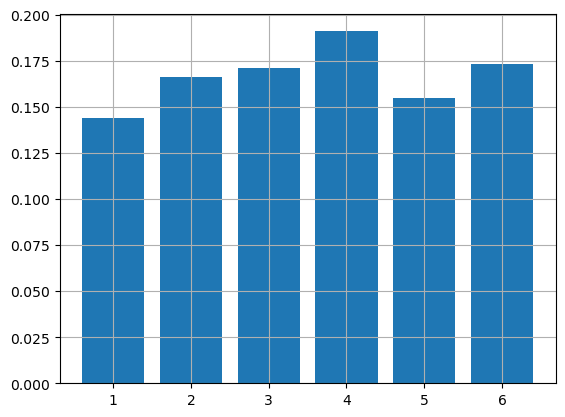

In [53]:
# サイコロを1000回振ってみる
calc_steps = 1000

# 1~6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字の確率を計算
prob_data = np.array([])
for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)


plt.bar(dice_data, prob_data)
plt.grid(True)

### 2-2 ベルヌーイ分布

In [54]:
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])

# uniqueで一意な値を抽出（ここの場合は0,1）
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)

0 が出る確率 0.625
1 が出る確率 0.375


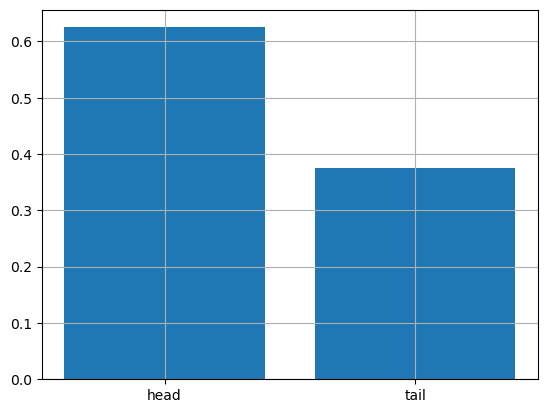

In [55]:
plt.bar([0,1], prob_be_data, align='center')
plt.xticks([0,1],['head', 'tail'])
plt.grid(True)

### 2-3 Pythonで分布に基づくデータを取得する

### 2-4 二項分布

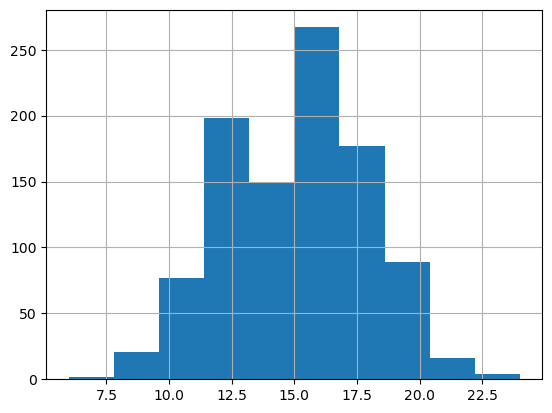

In [56]:
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

### 2-5 ポアソン分布

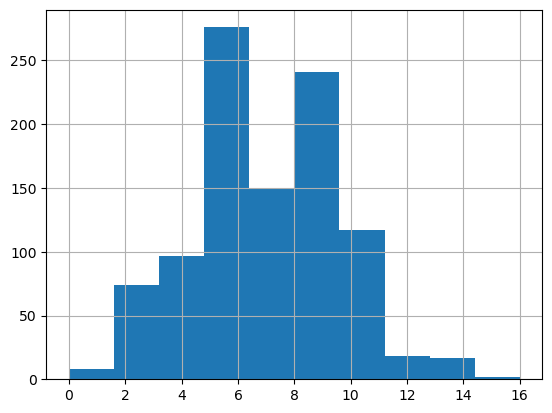

In [57]:
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

### 2-6 正規分布と対数正規分布

### 正規分布

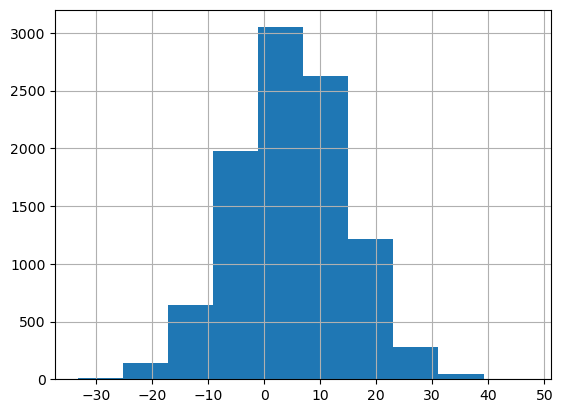

In [58]:
x = np.random.normal(5,10,10000)
plt.hist(x)
plt.grid(True)

### 対数正規分布

In [59]:
x = np.random.lognormal(30, 0.4, 1000)

## 4-3-3 カーネル密度関数

In [60]:
# ここは3章と同じ
import requests, zipfile
from io import StringIO
import io

#データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

#データをurlから取得する
r = requests.get(url, stream=True)

#zipファイルを読み書きする
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#データをDataframeとして読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


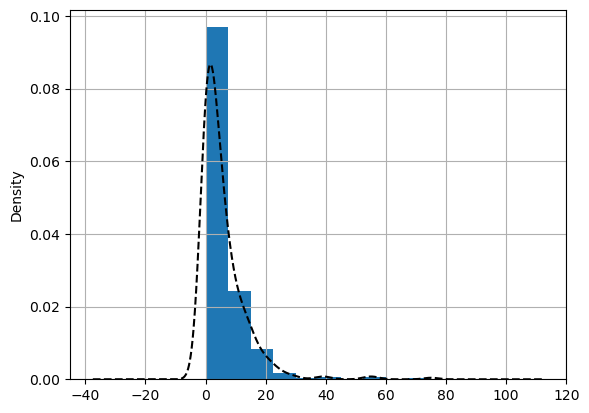

In [61]:
# カーネル密度関数（与えられたデータから密度関数を推定）
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム
student_data_math.absences.hist(density=True)
plt.grid(True)

## ここから練習問題
### 練習問題4-4 標本分布

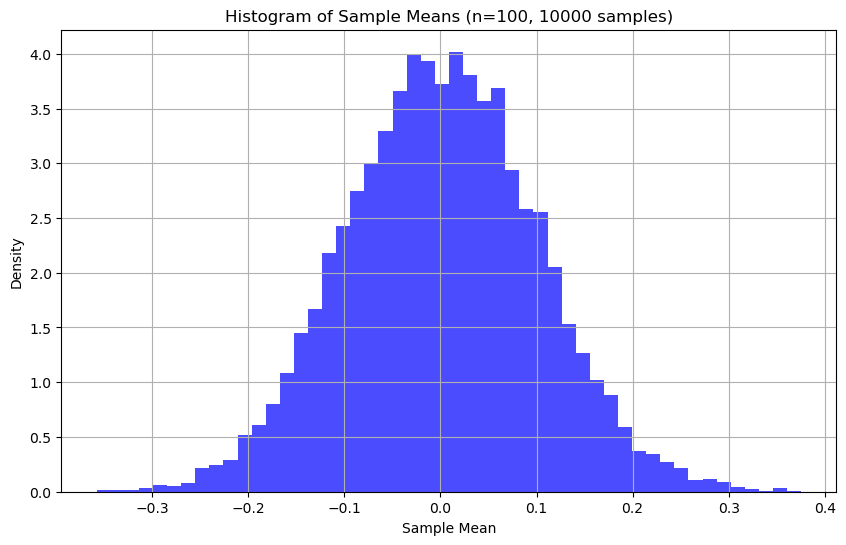

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
n = 100
num_samples = 10000

# Generate samples
samples = np.random.normal(loc=0, scale=1, size=(num_samples, n))

# Calculate sample means
sample_means = np.mean(samples, axis=1)

# Plot histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Histogram of Sample Means (n=100, 10000 samples)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.grid(True)
plt.show()


### 練習問題 4-5 対数正規分布バージョン

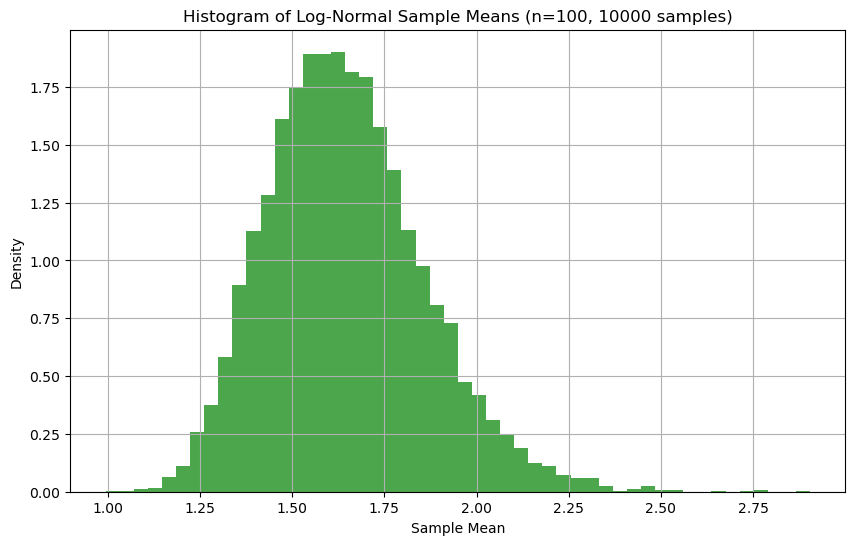

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
n = 100
num_samples = 10000

# Generate log-normal samples
log_samples = np.random.lognormal(mean=0, sigma=1, size=(num_samples, n))

# Calculate sample means
log_sample_means = np.mean(log_samples, axis=1)

# Plot histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(log_sample_means, bins=50, density=True, alpha=0.7, color='green')
plt.title('Histogram of Log-Normal Sample Means (n=100, 10000 samples)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.grid(True)
plt.show()


### 練習問題 4-6 数学成績データのヒストグラムとカーネル密度推定

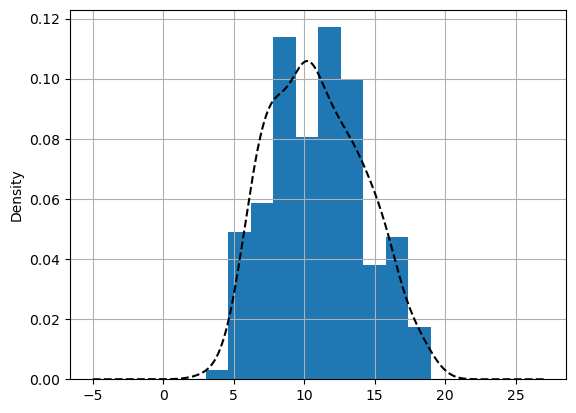

In [64]:
# カーネル密度関数（与えられたデータから密度関数を推定）
student_data_math.G1.plot(kind='kde', style='k--')

# 単純なヒストグラム
student_data_math.G1.hist(density=True)
plt.grid(True)

# 4-4 応用：多次元確率分布
## 4-4-1 同時確率関数と周辺確率関数

## 4-4-2 条件付き確率関数と条件付き期待値

## 4-4-3 独立の定義と連続分布

### 3-1 2次元の正規分布をグラフで表示する

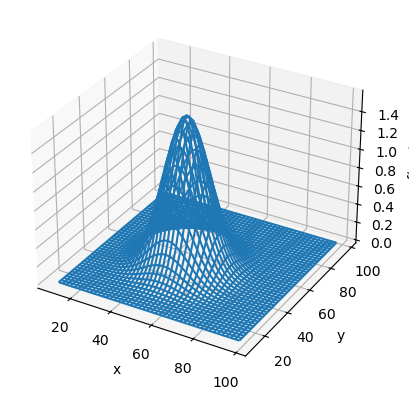

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# データの設定
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))
pos[:,:,0] = x
pos[:,:,1] = y

# 多次元正規分布
rv = multivariate_normal([50,50], [[100, 0], [0, 100]])

# 確立密度関数
z = rv.pdf(pos)

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# z軸のメモリ単位を変更、style='sci'が指数表示
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

plt.show()


# 4-5 確率統計学
## 4-5-1 大数の法則

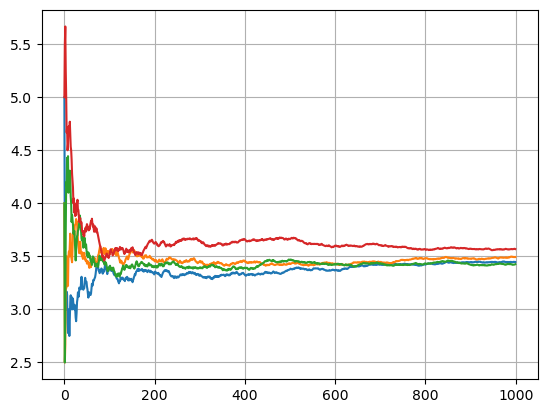

In [66]:
calc_times = 1000
sample_array = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1, calc_times+1)

# 4つのパスを作成
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot( p / number_cnt)
    plt.grid(True)

## 4-5-2 中心極限定理

In [67]:
def function_central_theory(N):
    sample_array = np.array([1,2,3,4,5,6])
    number_cnt = np.arange(1, N + 1) * 1.0
    mean_array = np.array([])
    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum() * 1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
    plt.hist(mean_array)
    plt.grid(True)

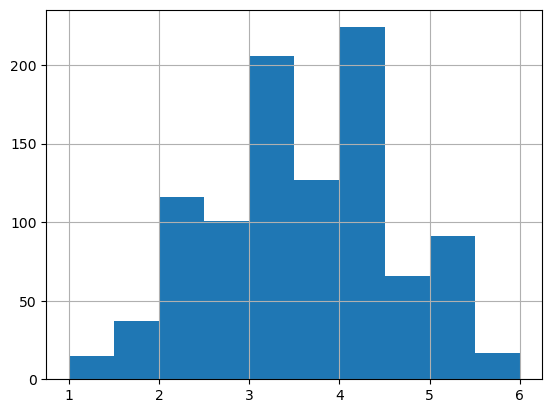

In [68]:
function_central_theory(3)

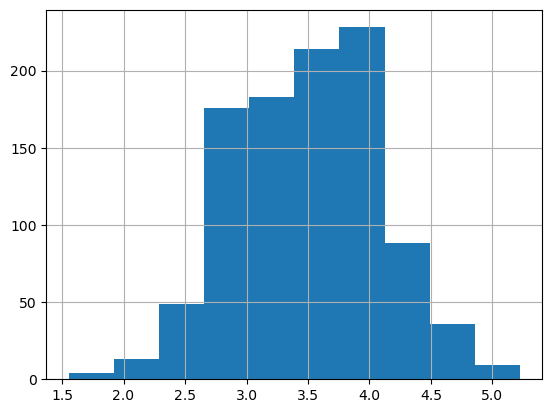

In [69]:
function_central_theory(9)

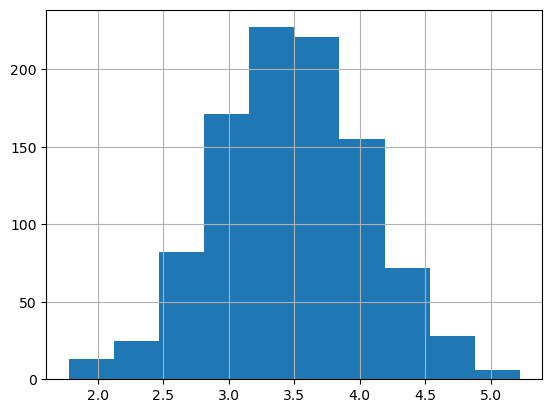

In [70]:
function_central_theory(10^3)

## 4-5-3 標本分布
### 3-1 カイニ乗分布

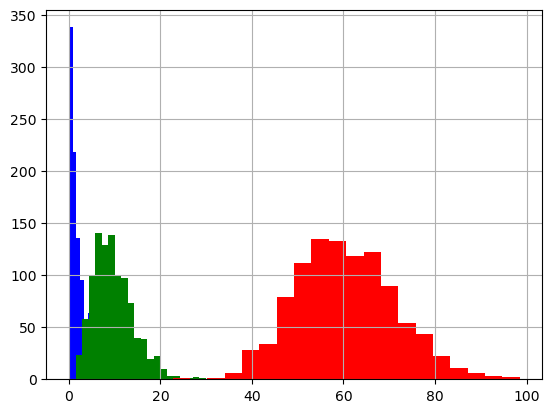

In [71]:
for df, c in zip([2,10,60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

### 3-2 スチューデントt分布

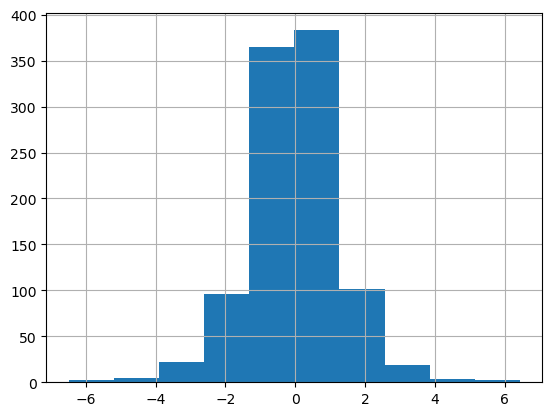

In [72]:
x = np.random.standard_t(5,1000)
plt.hist(x)
plt.grid(True)

### 3-3 F分布

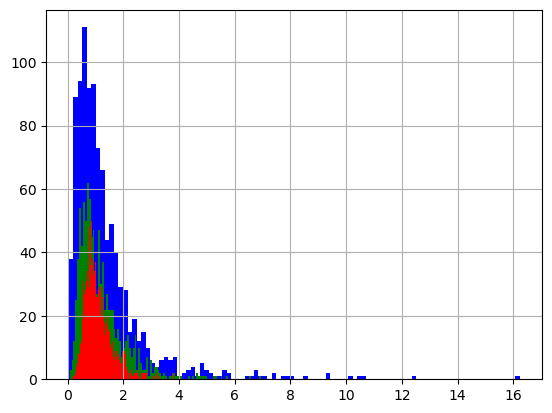

In [73]:
for df, c in zip([(6,7), (10,10),(20,25)], 'bgr'):
    x = np.random.f(df[0],df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)

## ここから練習問題
### 練習問題 4-7 カイ2乗分布からの乱数をヒストグラムへ

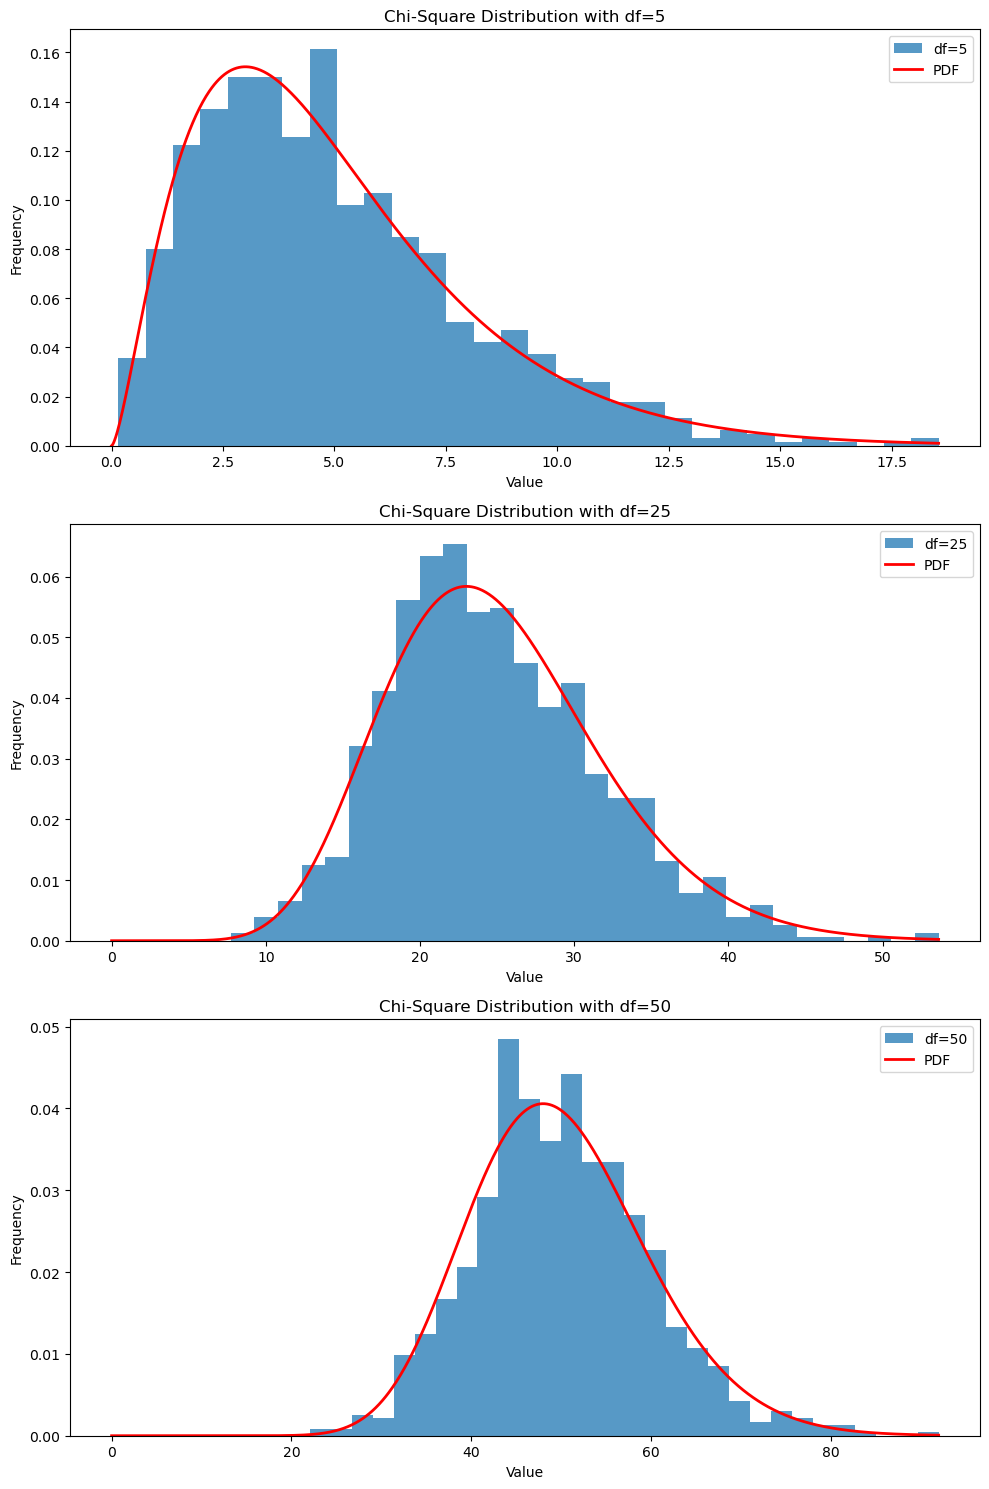

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 自由度
df_list = [5, 25, 50]

# 乱数生成
random_numbers = {df: np.random.chisquare(df, 1000) for df in df_list}

# ヒストグラムの作成
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, df in enumerate(df_list):
    ax = axes[i]
    ax.hist(random_numbers[df], bins=30, density=True, alpha=0.75, label=f'df={df}')
    x = np.linspace(0, np.max(random_numbers[df]), 1000)
    ax.plot(x, stats.chi2.pdf(x, df), 'r-', lw=2, label='PDF')
    ax.set_title(f'Chi-Square Distribution with df={df}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


### 練習問題 4-8 t分布からの乱数をヒストグラムに

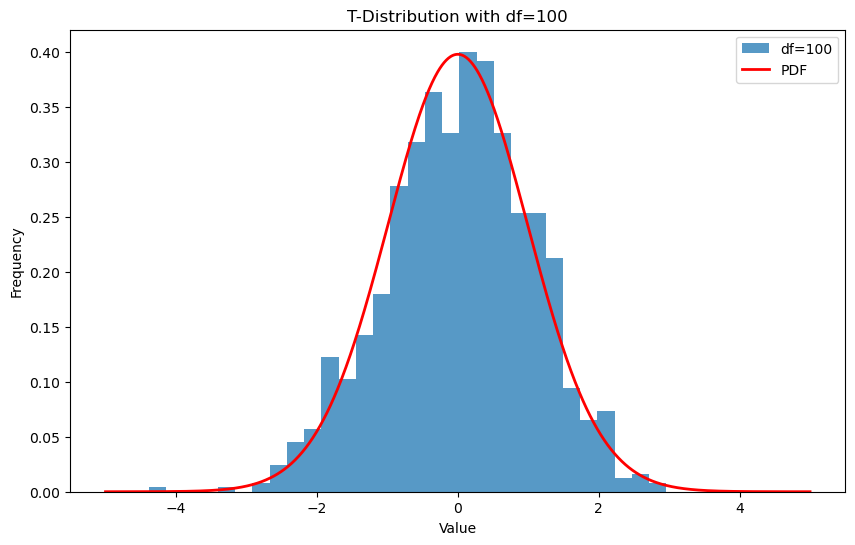

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 自由度
df = 100

# 乱数生成
random_numbers = np.random.standard_t(df, 1000)

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=30, density=True, alpha=0.75, label=f'df={df}')

# 理論的な確率密度関数（PDF）
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.t.pdf(x, df), 'r-', lw=2, label='PDF')

plt.title(f'T-Distribution with df={df}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### 練習問題 4-9 F分布からの乱数をヒストグラムに

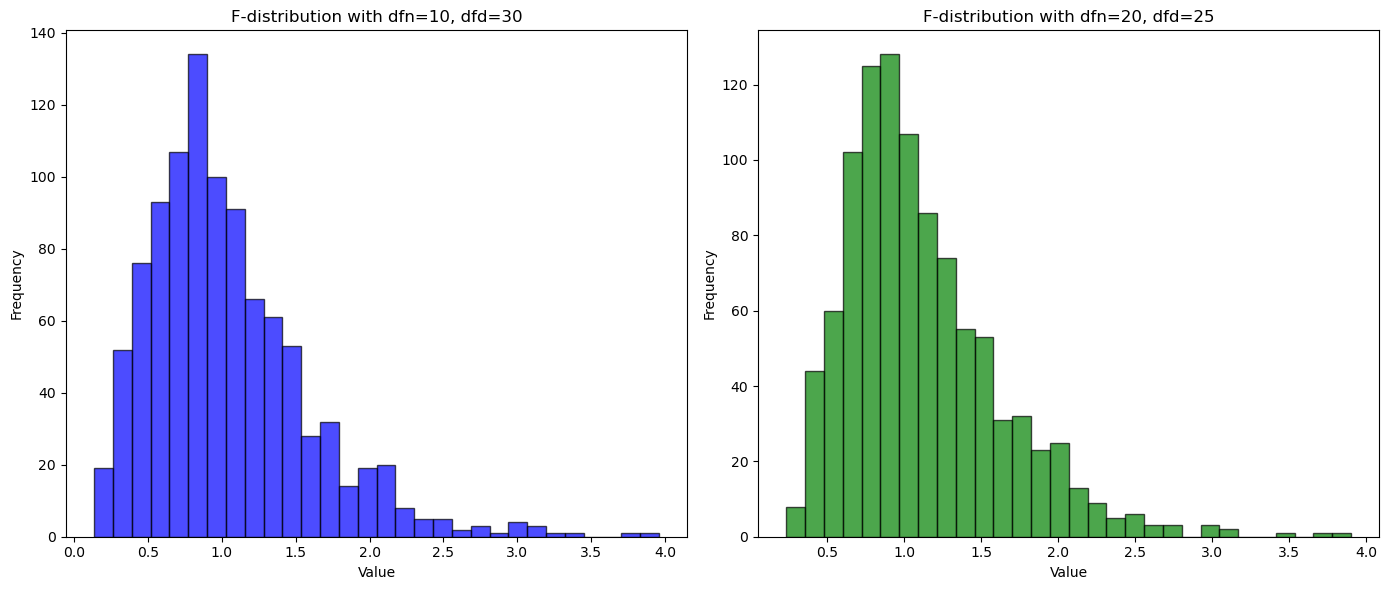

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for F-distributions
dfn1, dfd1 = 10, 30
dfn2, dfd2 = 20, 25

# Generate random numbers
f_dist1 = np.random.f(dfnum=dfn1, dfden=dfd1, size=1000)
f_dist2 = np.random.f(dfnum=dfn2, dfden=dfd2, size=1000)

# Create histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(f_dist1, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title(f'F-distribution with dfn={dfn1}, dfd={dfd1}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(f_dist2, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title(f'F-distribution with dfn={dfn2}, dfd={dfd2}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 4-6 統計的検定
## 4-6-1 推定点と点推定

## 4-6-2 不偏性と一致性
標本平均$\bar{X}$は以下の通りになる。

$$
    \bar{X} = 1/n\sum_{i=1}^{n}Xi
$$

## 4-6-3 区間推定

## 4-6-4 推定量について求める

### 4-1 最尤法

### 4-2 ベイズ法

## 練習問題 4-10

# 標本平均の不偏性の証明

統計学において、標本平均の不偏性を示すことは、標本平均が母平均の推定量として適切であることを証明するために重要です。

## 前提条件

- 正規母集団の平均を $\mu$、分散を $\sigma^2$ とします。
- 母集団から大きさ $n$ の標本を抽出し、その標本平均を $\bar{X}$ とします。

## 証明

標本平均 $\bar{X}$ が不偏推定量であることを示すには、標本平均の期待値が母平均に等しいことを証明すればよいです。

標本 $\{X_1, X_2, \ldots, X_n\}$ を抽出したときの標本平均は次のように定義されます：

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

この標本平均の期待値 $E[\bar{X}]$ を計算します。

まず、標本平均の期待値は次のように計算されます：

$$
E[\bar{X}] = E\left[\frac{1}{n} \sum_{i=1}^{n} X_i \right]
$$

期待値の線形性を利用して、この式を次のように変形します：

$$
E[\bar{X}] = \frac{1}{n} \sum_{i=1}^{n} E[X_i]
$$

ここで、各 $X_i$ は母集団の平均 $\mu$ に等しいので：

$$
E[X_i] = \mu \quad \text{for all } i
$$

したがって、上の式は次のようになります：

$$
E[\bar{X}] = \frac{1}{n} \sum_{i=1}^{n} \mu
$$

この和を計算すると：

$$
E[\bar{X}] = \frac{1}{n} \cdot n \cdot \mu = \mu
$$

以上より、標本平均の期待値は母平均に等しいことがわかります。すなわち：

$$
E[\bar{X}] = \mu
$$

このことから、標本平均 $\bar{X}$ は母平均 $\mu$ の不偏推定量であることが示されました。

## まとめ

標本平均 $\bar{X}$ の期待値が母平均 $\mu$ に等しいことを示すことで、標本平均が母平均の不偏推定量であることを証明しました。これにより、標本平均は母平均の推定に適した推定量であることがわかります。


## 練習問題 4-11

### 最尤法による推定

最尤法（Maximum Likelihood Estimation, MLE）では、観測データに対する尤度関数を最大化することによってパラメータを推定します。コインの表が出る確率を $\theta$ とすると、裏が出る確率は $1 - \theta$ となります。

観測データ：裏、表、裏、表、表

尤度関数 $L(\theta)$ は次のように表されます。

$$
L(\theta) = P(\text{裏、表、裏、表、表} | \theta) = (1-\theta)\theta(1-\theta)\theta\theta = (1-\theta)^2 \theta^3
$$

対数尤度関数は以下のようになります。

$$
\log L(\theta) = 2 \log(1-\theta) + 3 \log \theta
$$

この対数尤度関数を $\theta$ で微分して0とおきます。

$$
\frac{d}{d \theta} \log L(\theta) = \frac{2}{1-\theta} \cdot (-1) + \frac{3}{\theta} = 0
$$

これを解くと、

$$
-\frac{2}{1-\theta} + \frac{3}{\theta} = 0 \\
-2 \theta + 3 (1-\theta) = 0 \\
-2 \theta + 3 - 3 \theta = 0 \\
-5 \theta + 3 = 0 \\
\theta = \frac{3}{5}
$$

従って、最尤法による推定値は $\theta = \frac{3}{5}$ です。

### ベイズ法による推定

ベイズ法では、事前分布（Prior Distribution）と観測データに基づいて事後分布（Posterior Distribution）を計算します。ここでは、事前分布としてベータ分布 $\text{Beta}(\alpha, \beta)$ を用います。観測データが得られた後の事後分布はベータ分布 $\text{Beta}(\alpha + 表の回数, \beta + 裏の回数)$ になります。

事前分布: $\theta \sim \text{Beta}(\alpha, \beta)$

観測データ: 表の回数 = 3, 裏の回数 = 2

事後分布: $\theta \sim \text{Beta}(\alpha + 3, \beta + 2)$

例えば、事前分布を $\text{Beta}(1, 1)$（一様分布）とすると、

事後分布: $\theta \sim \text{Beta}(1 + 3, 1 + 2) = \text{Beta}(4, 3)$

ベータ分布の平均は $\frac{\alpha}{\alpha + \beta}$ で与えられるので、事後分布の平均は以下のようになります。

$$
\mathbb{E}[\theta | データ] = \frac{4}{4 + 3} = \frac{4}{7}
$$

従って、ベイズ法による推定値は $\theta = \frac{4}{7}$ です。

最尤法による推定値: θ = 0.60
ベイズ法による推定値: θ = 0.57


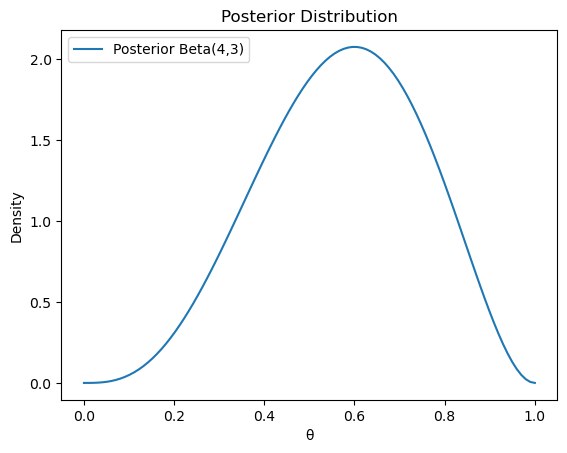

In [77]:
import numpy as np
import scipy.stats as stats

# 観測データ
data = ['裏', '表', '裏', '表', '表']
heads = data.count('表')
tails = data.count('裏')

# 最尤法による推定
mle_theta = heads / (heads + tails)
print(f"最尤法による推定値: θ = {mle_theta:.2f}")

# ベイズ法による推定
alpha_prior = 1
beta_prior = 1

posterior_alpha = alpha_prior + heads
posterior_beta = beta_prior + tails

bayesian_theta = posterior_alpha / (posterior_alpha + posterior_beta)
print(f"ベイズ法による推定値: θ = {bayesian_theta:.2f}")

# ベータ分布のプロット
x = np.linspace(0, 1, 100)
posterior_dist = stats.beta(posterior_alpha, posterior_beta)
plt.plot(x, posterior_dist.pdf(x), label=f'Posterior Beta({posterior_alpha},{posterior_beta})')
plt.xlabel('θ')
plt.ylabel('Density')
plt.title('Posterior Distribution')
plt.legend()
plt.show()

## 練習問題 4-12

$$
f[x|\lambda] = \lambda \exp(-\lambda x)
$$

指数分布に従う母集団から標本$X_1, X_2, \ldots, X_n$ を得た場合、母数 $\lambda$ を最尤推定するための方法を示します。指数分布の確率密度関数は以下の通りです：

$$
f(x|\lambda) = \lambda \exp(-\lambda x)
$$

ここで、最尤推定法に従って $\lambda$の推定量を求める手順を以下に示します。

### 1. 尤度関数の構築

標本 $ X_1, X_2, \ldots, X_n $に対する尤度関数 $ L(\lambda) $は、各標本の確率密度関数の積として表されます：

$$
L(\lambda) = \prod_{i=1}^{n} \lambda \exp(-\lambda X_i)
$$

### 2. 尤度関数の対数を取る

計算を容易にするために、尤度関数の対数を取ります。対数尤度関数 $ \ell(\lambda) $は以下のようになります：

$$
\ell(\lambda) = \log L(\lambda) = \sum_{i=1}^{n} \log(\lambda \exp(-\lambda X_i))
$$

対数の性質を利用して、さらに簡単にします：

$$
\ell(\lambda) = \sum_{i=1}^{n} \left( \log \lambda + \log \exp(-\lambda X_i) \right)
$$

$$
\ell(\lambda) = \sum_{i=1}^{n} \left( \log \lambda - \lambda X_i \right)
$$

$$
\ell(\lambda) = n \log \lambda - \lambda \sum_{i=1}^{n} X_i
$$

### 3. 尤度方程式の解を求める

対数尤度関数を最大化するために、$\lambda$についての微分を行い、それをゼロに等置します：

$$
\frac{d\ell(\lambda)}{d\lambda} = \frac{n}{\lambda} - \sum_{i=1}^{n} X_i
$$

これをゼロに設定して解きます：

$$
\frac{n}{\lambda} - \sum_{i=1}^{n} X_i = 0
$$

$$
\lambda = \frac{n}{\sum_{i=1}^{n} X_i}
$$

### 4. 最尤推定量

したがって、母数 $\lambda$の最尤推定量 $\hat{\lambda}$は以下のようになります：

$$
\hat{\lambda} = \frac{n}{\sum_{i=1}^{n} X_i}
$$

この結果を用いて、指数分布に従う母集団の母数 $\lambda$を推定することができます。

# 4-7 統計的検定

In [78]:
# 数学のデータを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [79]:
# ポルトガルのデータを読み込む
student_data_por = pd.read_csv('student-por.csv', sep=';')
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [80]:
# マージする
student_data_merge = pd.merge(student_data_math
							  , student_data_por
							  , on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus'
				 					, 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
							  , suffixes=('_math', '_por'))

print('G1数学の成績平均:', student_data_merge.G1_math.mean())
print('G1ポルトガル語の成績平均:', student_data_merge.G1_por.mean())

G1数学の成績平均: 10.861256544502618
G1ポルトガル語の成績平均: 12.112565445026178


## 4-7-1 検定

In [81]:
# p値が低ければ低いほど、あり得ないことが起きた（帰無仮説が正しくないという統計量が計算された）ということになる
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print('p値 = ', p)

p値 =  1.6536555217101022e-16


## 4-7-2 第１種の過誤と第2種の過誤

## 4-7-3 ビックデータに対する検定の注意
ビックデータの解析には、検定は向いていない！

サンプルサイズを大きくすると、検定力1-βが大きくなり、実務的には等しいと考えてもいいような微妙な差でもp値が低く出てしまう

## 練習問題 4-13

In [82]:
# G2の数学とポルトガル語の成績の平均に差があると言えるか。
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G2_math, student_data_merge.G2_por)
print('p値 = ', p)

p値 =  4.0622824801348625e-19


In [83]:
# G3ではどうか
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G3_math, student_data_merge.G3_por)
print('p値 = ', p)

p値 =  5.561492113688385e-21


# 4章　総合問題
## 総合問題 4-1 検定

In [85]:
student_data_merge.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [86]:
# 欠席数に差があると言えるか
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.absences_math, student_data_merge.absences_por)
print('p値 = ', p)

p値 =  2.3441656888384195e-06


In [87]:
# 勉強時間
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.studytime_math, student_data_merge.studytime_por)
print('p値 = ', p)

p値 =  0.5643842756976525
